**LAB 1 - Simple Signal Modeling**

In this class:
* Modeling simple Sin and Cos signal and Waves

**Signal**

In [1]:
from thinkdsp import CosSignal, SinSignal, SquareSignal, SawtoothSignal, ParabolicSignal, CubicSignal, TriangleSignal, GlottalSignal, decorate
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cos_sig = CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = SinSignal(freq=880, amp=0.5, offset=0)
square_sig = SquareSignal(freq=440, amp=1.0, offset=0)
sawtooth_sig = SawtoothSignal()
parabolic_sig = ParabolicSignal()
cubic_sig = CubicSignal()
triangle_sig = TriangleSignal()
glottal_sig = GlottalSignal()

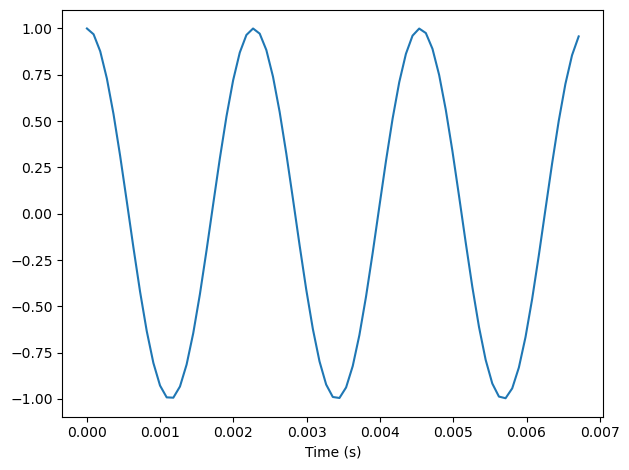

In [3]:
cos_sig.plot()
decorate(xlabel='Time (s)')

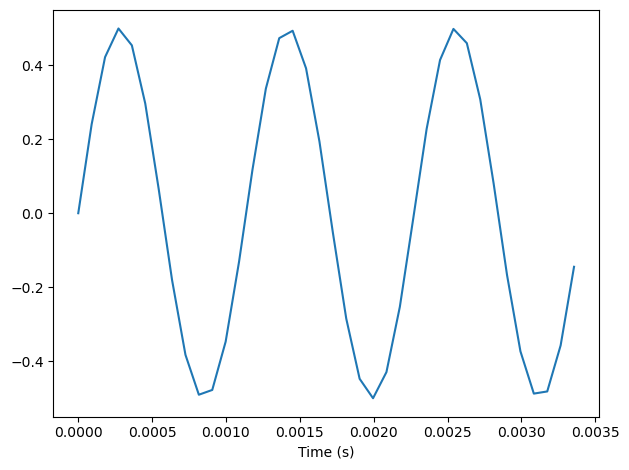

In [4]:
sin_sig.plot()
decorate(xlabel='Time (s)')

In [5]:
mix_sig = sin_sig + cos_sig

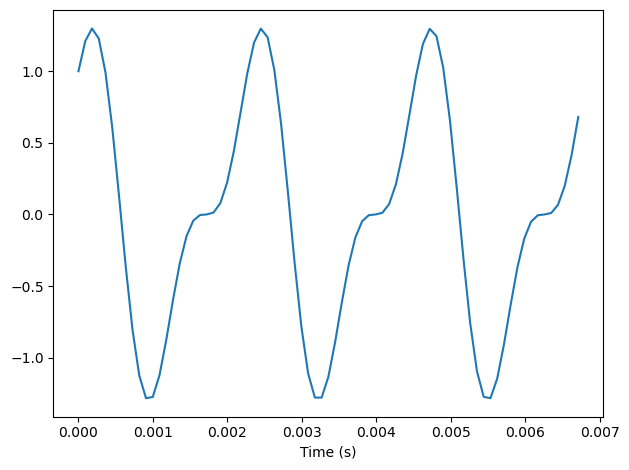

In [6]:
mix_sig.plot()
decorate(xlabel='Time (s)')

**Wave**

In [7]:
wave = mix_sig.make_wave(duration=2, start=0, framerate=11025)

In [8]:
from IPython.display import Audio
audio = Audio(data=wave.ys, rate=wave.framerate)
audio

In [9]:
print('Number of samples', len(wave.ys))
print('Timestep in ms', 1 / wave.framerate * 1000)

Number of samples 22050
Timestep in ms 0.09070294784580499


In [10]:
# to repeat signal several times
period = mix_sig.period
segment = wave.segment(start=0, duration=period*3)

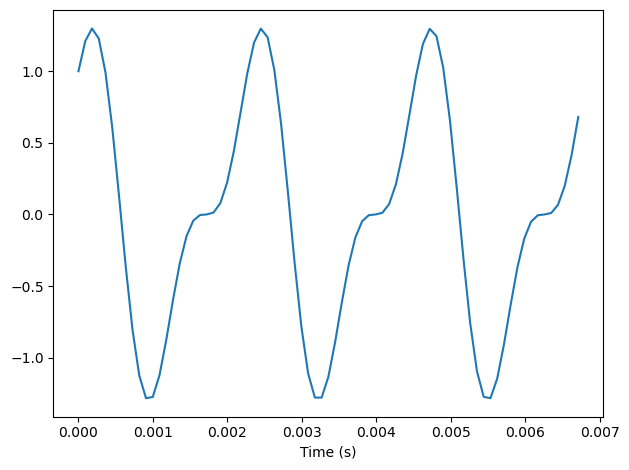

In [11]:
segment.plot()
decorate(xlabel='Time (s)')

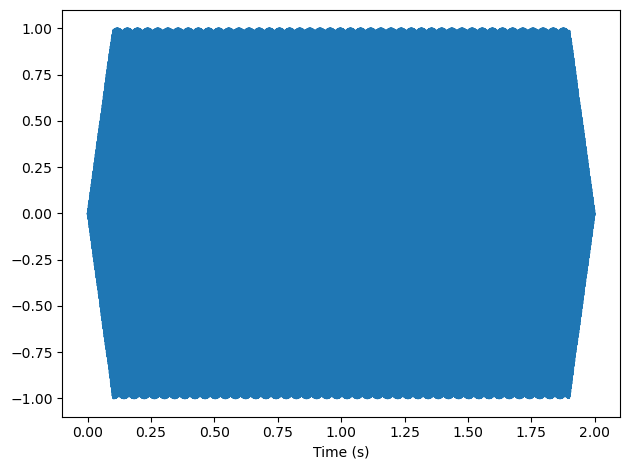

In [12]:
wave.normalize() # scales a wave so the range doesn't exceed -1 to 1.
wave.apodize() # tapers the beginning and end of the wave so it doesn't click when you play it.
wave.plot()
decorate(xlabel='Time (s)')

In [13]:
# wrtie wave as file
wave.write('temp.wav')

Writing temp.wav


In [14]:
# to play wave
from thinkdsp import play_wave

play_wave(filename='temp.wav', player='aplay')

In [15]:
# to read sound
from thinkdsp import read_wave

wave = read_wave('dsp_pack/code/92002__jcveliz__violin-origional.wav')

In [16]:
wave.make_audio()

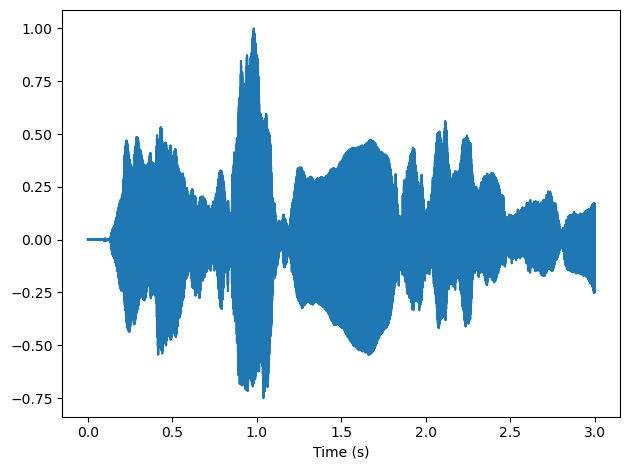

In [17]:
# to see slice of audio

start = 0
duration = 3
segment = wave.segment(start, duration)
segment.plot()
decorate(xlabel='Time (s)')

**Spectrum**

In [18]:
spectrum = segment.make_spectrum()

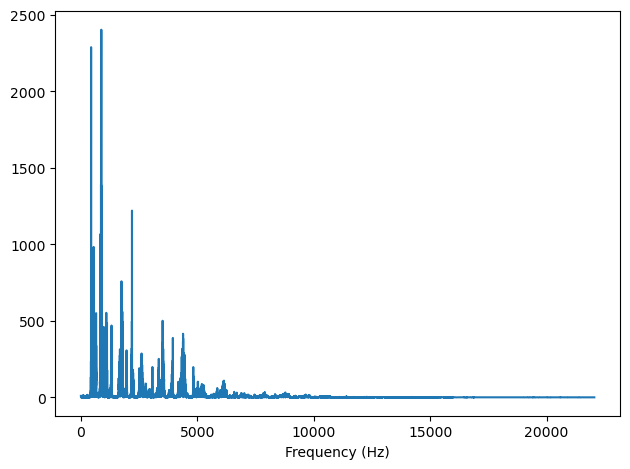

In [19]:
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

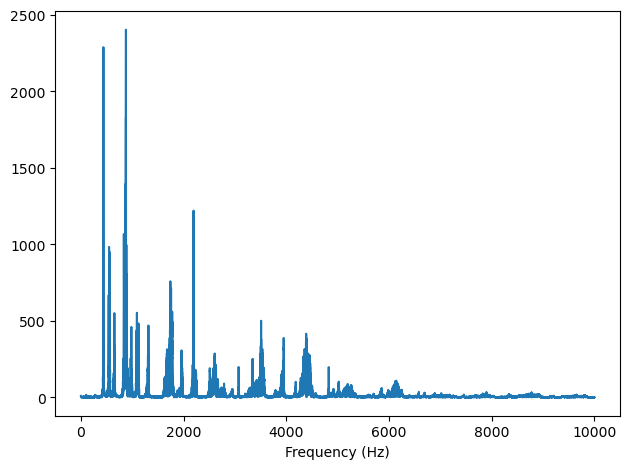

In [20]:
spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)')

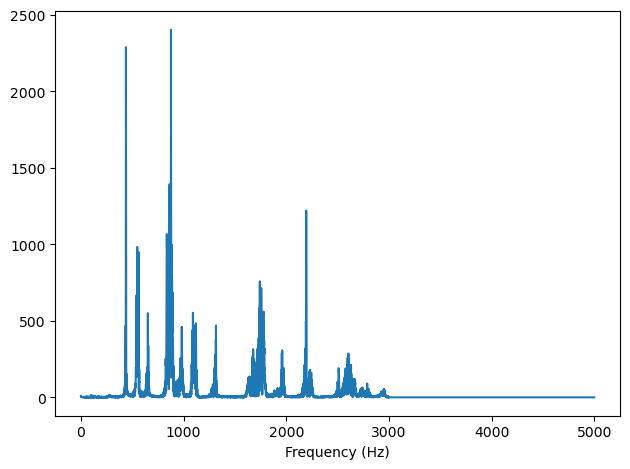

In [21]:
# low-pass filter
spectrum.low_pass(3000)
spectrum.plot(high=5000)
decorate(xlabel='Frequency (Hz)')

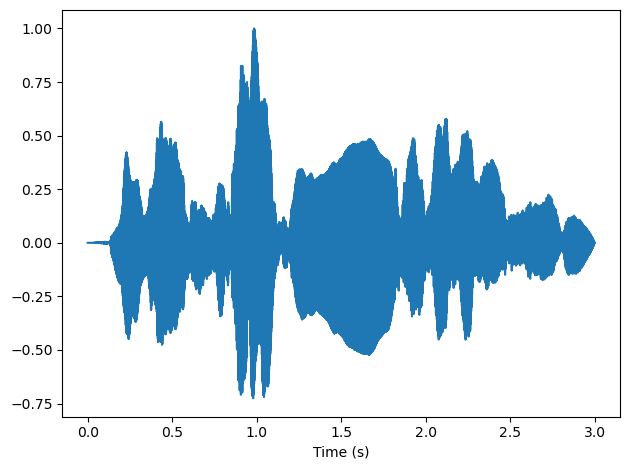

In [22]:
# covert spectrum to wave
filtered = spectrum.make_wave()
filtered.normalize()
filtered.apodize()
filtered.plot()
decorate(xlabel='Time (s)')

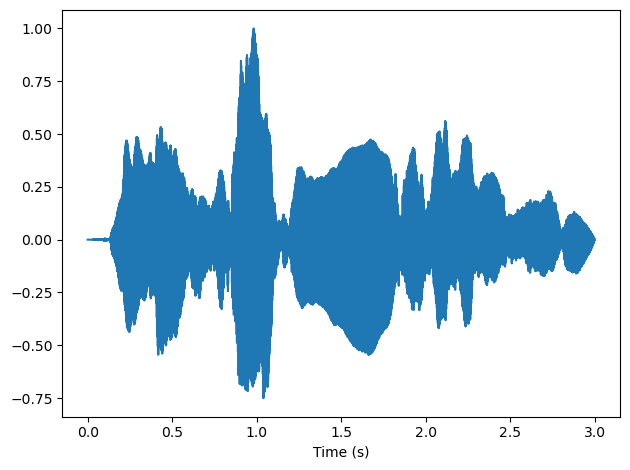

In [23]:
segment.normalize()
segment.apodize()
segment.plot()
decorate(xlabel='Time (s)')

In [24]:
# listen original one
segment.make_audio()

In [25]:
# listen filtered one
filtered.make_audio()

**Modeling voice letter by letter**

* Pronounce one letter and record audio;
* Do spectral analysis;
* Model letter with Sin | Cos waves;
* Compare modeled one and original;

*Tips*
* Filter original recording to get 'clear' sound;
* Model sound peace by pieces;
* Shorter recording - easier to model;
* Run in the loop to get the best fit for sample;

**Reading:**
* Scientific pitch notation: https://en.wikipedia.org/wiki/Scientific_pitch_notation
* Think DSP: Digital Signal Processing in Python: https://greenteapress.com/thinkdsp/html/index.html
* Sine Wave: https://en.wikipedia.org/wiki/Sine_wave
* Standing Wave: https://en.wikipedia.org/wiki/Standing_wave
* Fourier analysis: https://en.wikipedia.org/wiki/Fourier_analysis
* Documentation for thinkdsp.py: https://greenteapress.com/thinkdsp.html
